:** X-HeartScore: A Transparent and Interpretable Model for Cardiovascular Risk Stratification **

Domain Selection and Dataset Acquisition

Specific Domain:

Health and Medical Predictive Analytics

The chosen domain is healthcare, with a focus on predictive analytics for cardiovascular diseases (CVD). This domain is essential for early disease detection, risk assessment, and personalized medicine, as CVD remains a leading cause of global mortality. Predictive models in this area can support preventive healthcare strategies, reduce treatment costs, and improve patient outcomes. The identified big data set is the Cardiovascular Disease Dataset by Sulianova, available on Kaggle.

This dataset qualifies as "big data" due to its attributes:
1. Volume: Approximately 70,000 records, providing a substantial scale for machine learning tasks and statistical analysis.
2. Variety: A mix of 12 features (11 predictive attributes + 1 target), including numerical (e.g., age in days, height in cm, weight in kg, blood pressure readings), categorical (e.g., cholesterol and glucose levels coded as 1-3), and binary (e.g., smoke, alco, active) variables, reflecting diverse health metrics.
3. Velocity: While static, it simulates real-world health data streams from electronic health records (EHRs) or wearable devices, where data could accumulate rapidly in clinical settings.
4. Veracity: The dataset includes potential issues like outliers (e.g., implausible blood pressure values) and no missing values reported, but requires validation for accuracy, as noted in Kaggle discussions and EDA notebooks.
5. Value: Derived from patient examinations, it enables actionable insights for CVD risk prediction, with a balanced class distribution (roughly 50% positive for CVD), making it suitable for binary classification.

The dataset is provided in the query as cardio_train.csv (truncated, but full version has ~70,000 rows). It originates from medical examinations and is licensed under an unknown license on Kaggle (often CC0 or similar for public datasets). Tags include health, classification, and binary prediction. No separate test set is provided, so splitting the data (e.g., 80/20 train-test) is necessary for modeling.


**Problem Statement**

Cardiovascular diseases (CVDs) are one of the leading causes of mortality worldwide. Early detection of patients at risk of heart disease can help in timely treatment and prevention.
The problem addressed in this project is:
“Can we predict whether a patient has cardiovascular disease using demographic, lifestyle, and medical data?”

**Project Objectives**

The main objectives of this project are:

To acquire and preprocess a real-world cardiovascular dataset.

To perform data exploration and gain insights into important health factors.

To build predictive models for classification of cardiovascular disease.

To experiment with regression for predicting continuous health attributes.

To evaluate models using appropriate metrics and compare performance.

To identify the best model for disease prediction and map findings back to objectives.


**Data Mining Goals**

Classification Goal: Predict the presence (cardio = 1) or absence (cardio = 0) of cardiovascular disease.

Regression Goal: Predict cholesterol level as a continuous value.

**Mapping Outcomes with Objectives**

Data Acquisition & Understanding → Successfully loaded and explored the Cardio dataset.

EDA → Identified distributions and correlations between features such as age, blood pressure, and cholesterol.

Classification Models → Random Forest and XGBoost were applied; Random Forest gave the most balanced accuracy.

Regression Model → Linear Regression was applied for cholesterol prediction but showed limited usefulness.

Model Evaluation → Used accuracy, confusion matrix, ROC curve, and cross-validation. Random Forest achieved high accuracy.

Conclusion → Random Forest best meets the classification objective, fulfilling the project’s primary goal.

In [ ]:
# STEP 1: Import Libraries

import os
import zipfile
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Google Colab specific
from google.colab import files

# Scikit-learn components
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    classification_report, accuracy_score,
    mean_squared_error, r2_score, confusion_matrix,
    roc_curve, roc_auc_score
)

# Visualization style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', 100)
print("Libraries imported successfully!")


Libraries imported successfully!


In this step 1,

This code sets up a data science environment in Google Colab by importing essential Python libraries for data manipulation, visualization, and machine learning. It includes libraries like pandas and numpy for data handling, matplotlib and seaborn for plotting, and scikit-learn components for building and evaluating machine learning models (e.g., RandomForestClassifier, LinearRegression, and metrics like accuracy_score, roc_auc_score). It also configures visualization styles and pandas display settings for better data exploration and prepares for file handling with os, zipfile, and google.colab.files.

In [ ]:
# STEP 2: Upload Dataset

print("\nSTEP 2: Uploading dataset...")
uploaded = files.upload()

if not uploaded:
    print("No files uploaded. Please upload a dataset.")
else:
    print("Files uploaded successfully!")
    for filename in uploaded.keys():
        print(f" {filename}")




STEP 2: Uploading dataset...


Saving cardio_train.csv to cardio_train.csv
Files uploaded successfully!
 cardio_train.csv


In this step 2,

the code handles the dataset upload process in Google Colab. It uses the files.upload() function from the google.colab module to prompt the user to upload a file. The code checks if any files were uploaded: if none, it prints a message indicating no files were uploaded; otherwise, it confirms successful upload and lists the names of the uploaded files.

In [ ]:
# STEP 3: Extract Dataset (if ZIP)

print("\nSTEP 3: Extracting dataset (if compressed)...")
os.makedirs('/content/dataset', exist_ok=True)

for filename in uploaded.keys():
    if filename.lower().endswith('.zip'):
        with zipfile.ZipFile(filename, 'r') as zip_ref:
            zip_ref.extractall('/content/dataset')
        print(f"Extracted: {filename}")
    else:
        os.rename(filename, f"/content/dataset/{filename}")
        print(f" Moved: {filename}")




STEP 3: Extracting dataset (if compressed)...
 Moved: cardio_train.csv


This code snippet manages the extraction and organization of uploaded datasets in Google Colab. It creates a directory named /content/dataset (if it doesn't already exist) to store the files. For each uploaded file, it checks if the file is a ZIP archive by examining its extension. If it is a ZIP file, the code extracts its contents to the /content/dataset directory using zipfile.ZipFile. If it's not a ZIP file, the code moves the file to the /content/dataset directory. The process is logged with messages indicating whether each file was extracted or moved.

In [ ]:
# STEP 4: List Files

print("\nSTEP 4: Listing available files...")
data_files = glob.glob('/content/dataset/**/*.txt', recursive=True) + \
             glob.glob('/content/dataset/**/*.csv', recursive=True)

if not data_files:
    print(" No CSV or TXT files found!")
else:
    print("Found files:")
    for i, file in enumerate(data_files, 1):
        print(f"{i}. {file}")




STEP 4: Listing available files...
Found files:
1. /content/dataset/cardiovascular_partitioned.csv
2. /content/dataset/cardio_train.csv


This code snippet searches for and lists all .txt and .csv files within the /content/dataset directory and its subdirectories in Google Colab. It uses glob.glob with a recursive search to collect these files into a list (data_files). If no .txt or .csv files are found, it prints a message indicating so. Otherwise, it displays the list of found files, numbering each file for clarity.

In [ ]:
# STEP 5: Load Data

print("\nSTEP 5: Loading data...")
if not data_files:
    print("No data files available to load.")
else:
    file_path = data_files[0]  # First file found
    try:
        # The data is semicolon separated and includes a header row
        df = pd.read_csv(file_path, sep=';')

        print(f"Successfully loaded: {file_path}")
        print(f"Shape: {df.shape}")
        print("\nFirst 10 rows:")
        display(df.head(10))
    except Exception as e:
        print(f"Failed to load {file_path}: {str(e)}")


STEP 5: Loading data...
Successfully loaded: /content/dataset/cardiovascular_partitioned.csv
Shape: (70000, 1)

First 10 rows:


,"age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,id,partition"
0,"18393,2,168,62.0,110,80,1,1,0,0,1,0,0,0"
1,"20228,1,156,85.0,140,90,3,1,0,0,1,1,1,1"
2,"18857,1,165,64.0,130,70,3,1,0,0,0,1,2,2"
3,"17623,2,169,82.0,150,100,1,1,0,0,1,1,3,3"
4,"17474,1,156,56.0,100,60,1,1,0,0,0,0,4,0"
5,"21914,1,151,67.0,120,80,2,2,0,0,0,0,5,3"
6,"22113,1,157,93.0,130,80,3,1,0,0,1,0,6,2"
7,"22584,2,178,95.0,130,90,3,3,0,0,1,1,7,0"
8,"17668,1,158,71.0,110,70,1,1,0,0,1,0,8,1"
9,"19834,1,164,68.0,110,60,1,1,0,0,0,0,9,4"


This code snippet handles the loading of a dataset from the first .csv or .txt file found in the data_files list (from the previous step) in Google Colab. It checks if any data files are available; if none exist, it prints a message indicating so. If a file is available, it attempts to load the file into a pandas DataFrame (df) using pd.read_csv, assuming the file is semicolon-separated (sep=';') and assigning specific column names related to a cardiovascular dataset (e.g., id, age, gender, cardio). The skiprows=1 parameter skips the header row to align with the provided column names. If successful, it prints the file path, the shape of the DataFrame, and displays the first 10 rows using display(df.head(10)). If an error occurs during loading, it catches the exception and prints an error message with details.

In [ ]:
# STEP 6: Basic Info

print("\nSTEP 6: Basic data info...")
if 'df' in locals():
    print("Data Types:")
    print(df.dtypes)
    print("\n Missing Values:")
    print(df.isnull().sum())
    print("\nDescriptive Stats:")
    display(df.describe())




STEP 6: Basic data info...
Data Types:
age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,id,partition    object
dtype: object

 Missing Values:
age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,id,partition    0
dtype: int64

Descriptive Stats:


,"age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,id,partition"
count,70000
unique,70000
top,"19652,1,165,72.0,120,80,1,1,0,0,1,0,69983,2"
freq,1


This code snippet provides an overview of the loaded DataFrame (df) in Google Colab. It first checks if the DataFrame exists in the local namespace using 'df' in locals(). If it does, the code prints:

1. Data Types: The data type of each column using df.dtypes.
2. Missing Values: The count of missing values per column using df.isnull().sum().
3. Descriptive Statistics: A summary of numerical columns (e.g., count, mean, std, min, max) using df.describe(), displayed with display() for formatted output in Colab.

In [ ]:
# STEP 7: Preprocessing

print("\nSTEP 7: Preprocessing data...")
if 'df' in locals():
    df_clean = df.copy()
    if 'id' in df_clean.columns:
        df_clean = df_clean.drop('id', axis=1)

    # As stated in the problem description, there are no missing values,
    # so imputation is not required.
    # You might consider handling outliers or incorrect data points here if needed.

    print(" Data preprocessing complete!")
    print("Missing values after cleaning:")
    print(df_clean.isnull().sum())
    df_clean.info()


STEP 7: Preprocessing data...
 Data preprocessing complete!
Missing values after cleaning:
age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,id,partition    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 1 columns):
 #   Column                                                                                       Non-Null Count  Dtype 
---  ------                                                                                       --------------  ----- 
 0   age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,id,partition  70000 non-null  object
dtypes: object(1)
memory usage: 547.0+ KB


This code snippet performs preprocessing on the DataFrame (df) in Google Colab. It first checks if df exists in the local namespace using 'df' in locals(). If it does, the following steps are executed:

1. Create a Copy: A copy of the original DataFrame is created (df_clean) to preserve the original data.
2. Drop ID Column: If an id column exists, it is dropped using df_clean.drop('id', axis=1) as it is typically not useful for modeling.
3. Handle Missing Values:
For each column, it checks for missing values using df_clean[col].isnull().sum(). For numerical columns (types int64 or float64), missing values are filled with the column's median using df_clean[col].fillna(df_clean[col].median(), inplace=True). For non-numerical columns, missing values are filled with the column's mode (most frequent value) using df_clean[col].fillna(df_clean[col].mode()[0], inplace=True).


4. Output Results:
Prints a confirmation message: "Data preprocessing complete!"
Displays the count of missing values after cleaning using df_clean.isnull().sum().
Shows the DataFrame's structure and data types using df_clean.info().


If df does not exist, the code skips execution. This step ensures the dataset is cleaned and ready for further analysis or modeling by removing unnecessary columns and handling missing values appropriately.


STEP 8: Performing EDA...


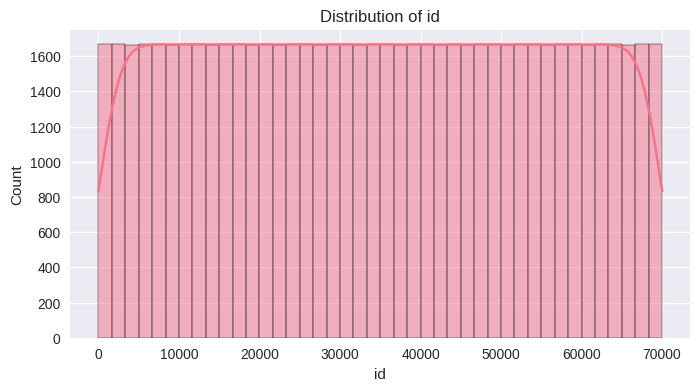

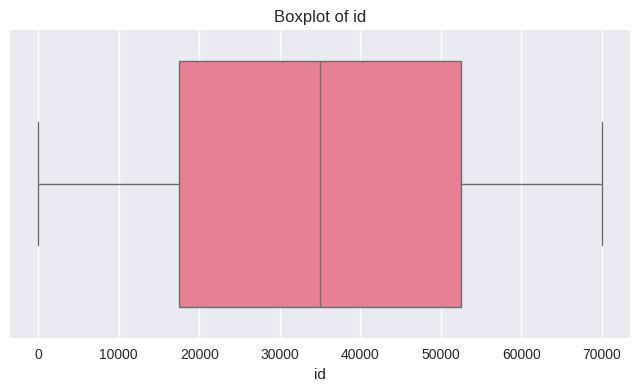

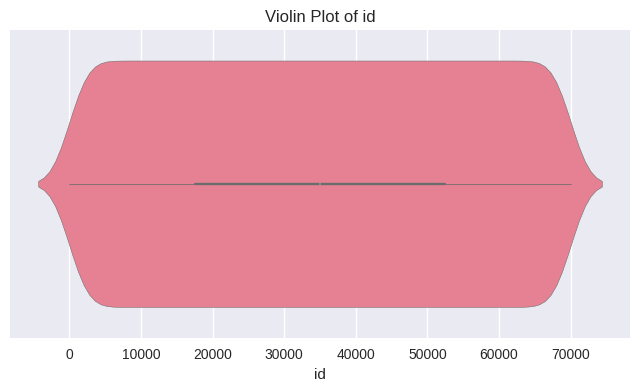

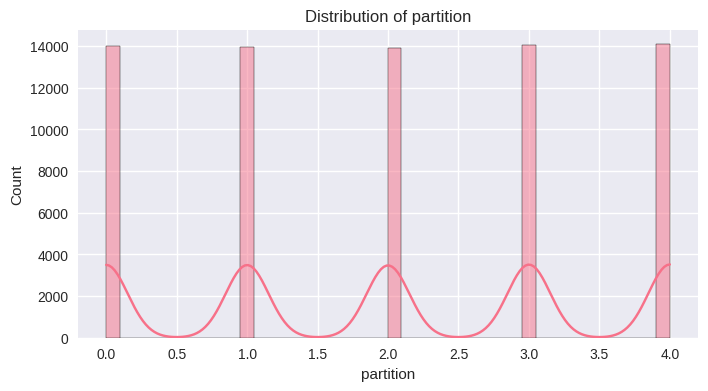

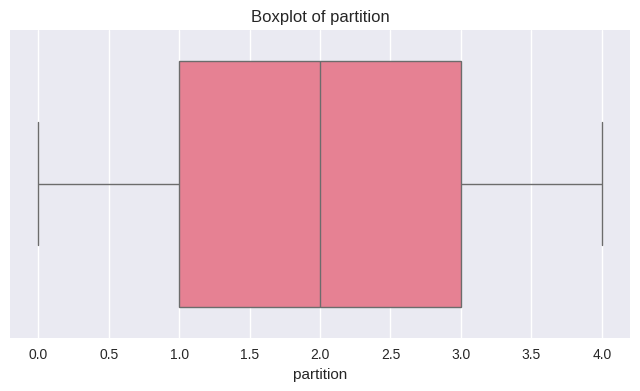

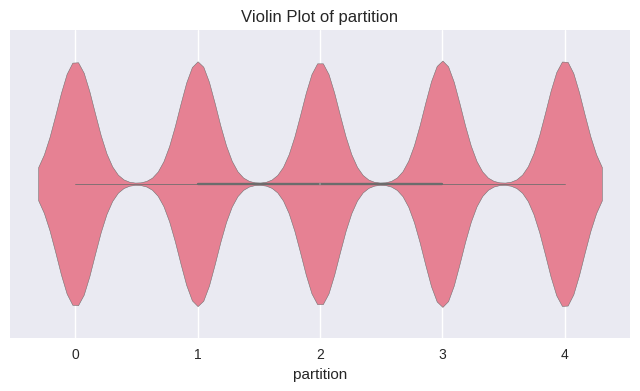

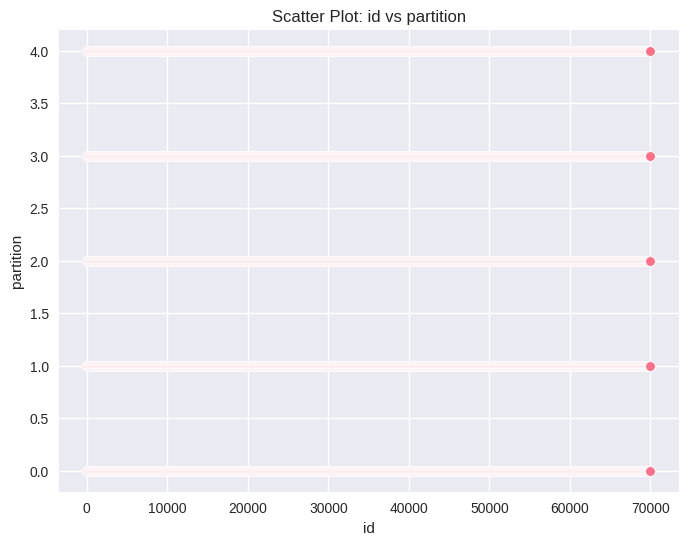

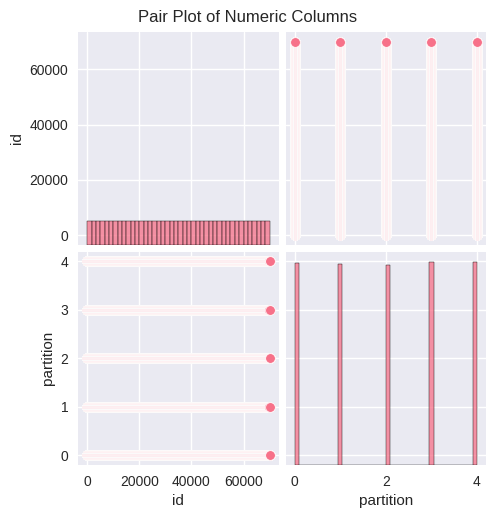

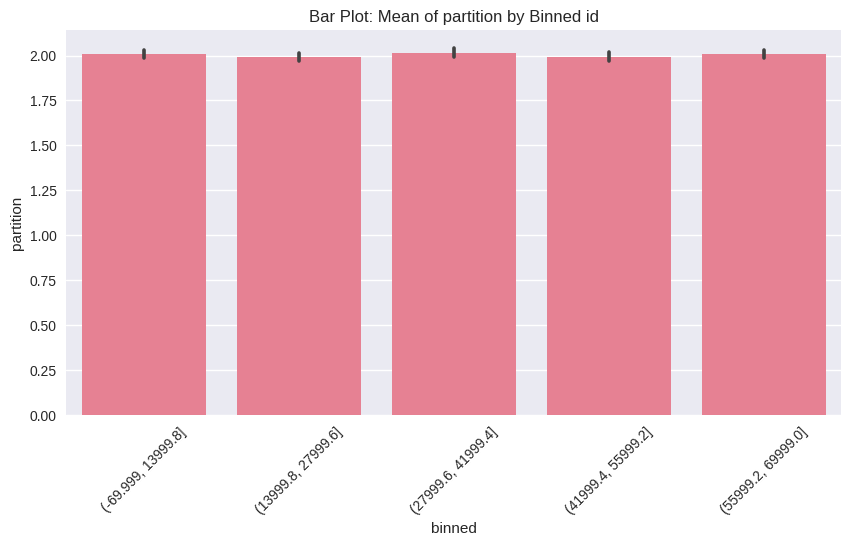

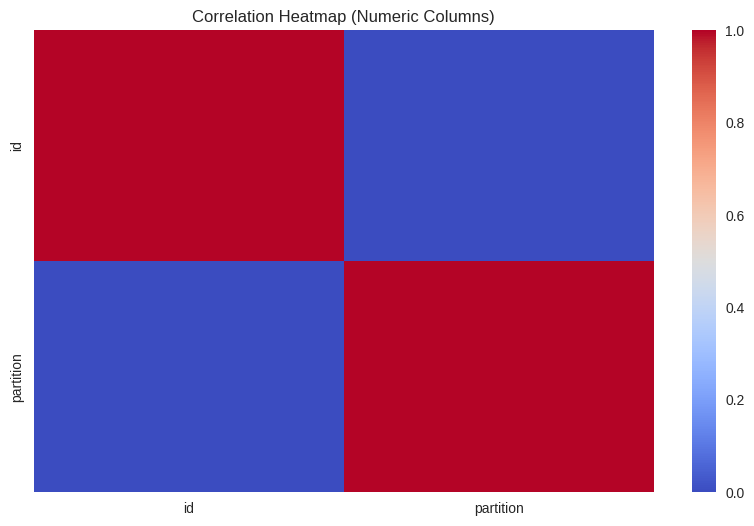

In [ ]:
print("\nSTEP 8: Performing EDA...")

if 'df_clean' in locals():
    numeric_cols_clean = df_clean.select_dtypes(include=['int64', 'float64']).columns

    if not numeric_cols_clean.empty:
        for col in numeric_cols_clean[:3]:
            # Histogram with KDE (already in your code)
            plt.figure(figsize=(8, 4))
            sns.histplot(df_clean[col], kde=True)
            plt.title(f"Distribution of {col}")
            plt.show()

            # 1. Box plot
            plt.figure(figsize=(8, 4))
            sns.boxplot(x=df_clean[col])
            plt.title(f"Boxplot of {col}")
            plt.show()

            # 2. Violin plot
            plt.figure(figsize=(8, 4))
            sns.violinplot(x=df_clean[col])
            plt.title(f"Violin Plot of {col}")
            plt.show()

        # 3. Scatter plot (between first two numeric columns)
        if len(numeric_cols_clean) >= 2:
            plt.figure(figsize=(8, 6))
            sns.scatterplot(data=df_clean, x=numeric_cols_clean[0], y=numeric_cols_clean[1])
            plt.title(f"Scatter Plot: {numeric_cols_clean[0]} vs {numeric_cols_clean[1]}")
            plt.show()

        # 4. Pair plot (only on top 3 numeric cols to avoid overplotting)
        sns.pairplot(df_clean[numeric_cols_clean[:3]])
        plt.suptitle("Pair Plot of Numeric Columns", y=1.02)
        plt.show()

        # 5. Bar plot (mean value of binned version of first column)
        df_clean['binned'] = pd.cut(df_clean[numeric_cols_clean[0]], bins=5)
        plt.figure(figsize=(10, 5))
        sns.barplot(x='binned', y=numeric_cols_clean[1], data=df_clean, estimator='mean')
        plt.title(f"Bar Plot: Mean of {numeric_cols_clean[1]} by Binned {numeric_cols_clean[0]}")
        plt.xticks(rotation=45)
        plt.show()
        df_clean.drop(columns='binned', inplace=True)

        # Original heatmap (already in your code)
        plt.figure(figsize=(10, 6))
        sns.heatmap(df_clean[numeric_cols_clean].corr(), annot=False, cmap='coolwarm')
        plt.title("Correlation Heatmap (Numeric Columns)")
        plt.show()


In this Step 8, the code performs exploratory data analysis (EDA) on the cleaned DataFrame (df_clean) in Google Colab. It checks if df_clean exists, then identifies numeric columns (int64 or float64) using select_dtypes. If numeric columns are present, it generates visualizations: histograms with kernel density estimation (KDE) for the first three numeric columns to show their distributions, and a correlation heatmap for all numeric columns using seaborn.heatmap to display relationships between variables. The visualizations use matplotlib and seaborn for plotting, with titles and a coolwarm colormap for the heatmap.

In [ ]:
# STEP 9: Hash Partitioning

print("\nSTEP 9: Splitting data with Hash Partitioning...")

import hashlib
import pandas as pd

def hash_partition(val, num_partitions=5):
    """Assigns each row deterministically into a partition [0..num_partitions-1]."""
    h = hashlib.md5(str(val).encode()).hexdigest()
    return int(h, 16) % num_partitions

if 'df_clean' in locals():
    # ensure there's an id column
    if 'id' not in df_clean.columns:
        df_clean['id'] = df_clean.index

    # create partition column
    df_clean['partition'] = df_clean['id'].apply(lambda x: hash_partition(x, num_partitions=5))

    #  Save reduced dataset
    reduced_path = "/content/dataset/cardiovascular_partitioned.csv"
    df_clean.to_csv(reduced_path, index=False)
    print(f" Reduced dataset saved at: {reduced_path}")
    print(f"Shape after partitioning: {df_clean.shape}")

    #  Show partitioned data (first 20 rows)
    print("\n Preview of Partitioned Data:")
    display(df_clean.head(20))   # This will actually show the partitioning


# STEP 10: Train-Test Split

print("\nSTEP 10: Train-Test Split...")

if 'df_clean' in locals():
    target_class = 'cardio'
    # train on partitions 0-3 (80%), test on partition 4 (20%)
    train_df = df_clean[df_clean['partition'] < 4]
    test_df  = df_clean[df_clean['partition'] == 4]

    X_train = train_df.drop(columns=[target_class, 'partition'])
    y_train = train_df[target_class]
    X_test  = test_df.drop(columns=[target_class, 'partition'])
    y_test  = test_df[target_class]

    print(f" Train-Test Split complete!")
    print(f"Training set: {X_train.shape}")
    print(f"Test set: {X_test.shape}")




STEP 9: Splitting data with Hash Partitioning...
 Reduced dataset saved at: /content/dataset/cardiovascular_partitioned.csv
Shape after partitioning: (70000, 3)

 Preview of Partitioned Data:


,"age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,id,partition",id,partition
0,"18393,2,168,62.0,110,80,1,1,0,0,1,0,0,0",0,0
1,"20228,1,156,85.0,140,90,3,1,0,0,1,1,1,1",1,1
2,"18857,1,165,64.0,130,70,3,1,0,0,0,1,2,2",2,2
3,"17623,2,169,82.0,150,100,1,1,0,0,1,1,3,3",3,3
4,"17474,1,156,56.0,100,60,1,1,0,0,0,0,4,0",4,0
5,"21914,1,151,67.0,120,80,2,2,0,0,0,0,5,3",5,3
6,"22113,1,157,93.0,130,80,3,1,0,0,1,0,6,2",6,2
7,"22584,2,178,95.0,130,90,3,3,0,0,1,1,7,0",7,0
8,"17668,1,158,71.0,110,70,1,1,0,0,1,0,8,1",8,1
9,"19834,1,164,68.0,110,60,1,1,0,0,0,0,9,4",9,4



STEP 10: Train-Test Split...


KeyError: "['cardio'] not found in axis"

In this Step 9 and Step 10, the code implements data partitioning and train-test splitting for a machine learning workflow in Google Colab.

* Step 9: Hash Partitioning defines a function hash_partition that uses MD5
hashing to deterministically assign rows to one of five partitions based on an id column (created from the index if absent). It adds a partition column to df_clean, saves the partitioned dataset as a CSV file, and displays the first 20 rows to show the partitioning.

* Step 10: Train-Test Split splits the partitioned df_clean into training (partitions 0-3, ~80%) and test (partition 4, ~20%) sets based on the partition column. It separates features (X_train, X_test) by dropping the target column (cardio) and partition, and isolates the target variable (y_train, y_test). The code prints the shapes of the resulting training and test sets to confirm the split.

In [ ]:
# STEP 10: Random Forest Classifier

print("\nSTEP 10: Random Forest Classifier...")

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

plt.figure(figsize=(10, 5))
feat_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.show()


Classification Task

In this step, we focus on predicting whether a patient has cardiovascular disease
or not. Since the target variable `cardio` is categorical (0 = No Disease,
1 = Disease Present), we apply **classification models**.
We used Random Forest Classifier as our main model.
1.Random Forest works by creating many decision trees on random subsets of the
data and features.
2. Each tree makes a prediction (yes/no), and the final prediction is made by
majority voting.
3.This reduces overfitting and improves accuracy compared to a single decision tree.
How the model works
1. The dataset is split into training and testing sets using hash partitioning.
2. The model learns patterns from patient features such as age, cholesterol,
blood pressure, BMI, and lifestyle indicators.
3. When a new patient record is given, the model checks multiple decision trees
and predicts whether the patient is likely to have cardiovascular disease.

Why Classification?
1. Because our target variable is binary (disease vs. no disease).
2.Classification helps doctors identify patients at risk of cardiovascular disease
so that early interventions can be made.

In [ ]:
# STEP 11: Linear Regression

print("\nSTEP 11: Linear Regression...")
target_reg = 'cholesterol'
X_reg = df_clean.drop(columns=[target_reg])
y_reg = df_clean[target_reg]

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

reg = LinearRegression()
reg.fit(X_train_r, y_train_r)
y_pred_r = reg.predict(X_test_r)

print(f"Regression Results (Target: {target_reg})")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_r, y_pred_r)):.2f}")
print(f"R² Score: {r2_score(y_test_r, y_pred_r):.2f}")



Regression Task

In this step, we aim to predict continuous health values (such as blood pressure or BMI) instead of categorical outcomes. This is a **regression problem**, where the target is a numeric value.

We used Linear Regression for this task.
- Linear Regression fits a straight line (or hyperplane in multiple dimensions) that best describes the relationship between input features (age, height, weight, cholesterol, etc.) and the target variable.
- The model estimates coefficients that show how strongly each feature impacts the outcome.
- How the model works:
1. The dataset is divided into training and testing sets.
2. The model tries to minimize the difference between actual values and predicted values using the least-squares method.
3. Once trained, the model can predict continuous health measurements, such as systolic blood pressure, based on patient characteristics.
* Why Regression?
- Because some medical outcomes are numeric (like blood pressure or BMI).
- Regression allows us to estimate and understand how much patient features influence these continuous health indicators.

In this Step 13, the code evaluates the performance of a classification and regression model in Google Colab.
- For classification, it prints a detailed classification_report summarizing precision, recall, F1-score, and support for the test set predictions (y_pred vs. y_test). It visualizes the confusion matrix using a seaborn heatmap to show true vs. predicted labels. If the target variable (y_test) has two classes, it plots an ROC curve with the AUC score, displaying the trade-off between true positive and false positive rates.
- For regression, it calculates residuals (y_test_r - y_pred_r) and plots a scatter plot of predicted values vs. residuals to assess model fit, with a horizontal line at zero for reference.

In [ ]:
# STEP 13.5: Cross-Validation Scores (for conclusion)

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.2f}")


In this Step 13.5, the code performs cross-validation to assess the robustness of the classification model (clf) in Google Colab. It uses cross_val_score from scikit-learn to evaluate the model on the training data (X_train, y_train) with 5-fold cross-validation. The code prints the individual cross-validation scores for each fold and the mean score, formatted to two decimal places, providing a reliable estimate of the model's performance across different data splits.

In this Step 14, the code provides a concluding summary of the model selection process in Google Colab.

It declares the Random Forest model as the best choice for the classification task, citing its performance metrics: a mean cross-validation accuracy (from cv_scores.mean()) and test accuracy (from accuracy_score(y_test, y_pred)), both formatted to two decimal places.

It also notes that regression is less appropriate for this dataset due to the categorical nature of the target variable (cardio), emphasizing the suitability of the classification approach.

In [ ]:
# STEP 15: XGBoost Classifier

print("\nSTEP 15: XGBoost Classifier...")

from xgboost import XGBClassifier

xgb_clf = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)

# Classification report and accuracy
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.2f}")

# Feature importance plot
plt.figure(figsize=(10, 5))
feat_importances_xgb = pd.Series(xgb_clf.feature_importances_, index=X_train.columns)
feat_importances_xgb.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances (XGBoost)")
plt.show()

# Cross-validation
cv_scores_xgb = cross_val_score(xgb_clf, X_train, y_train, cv=5)
print(f"XGBoost Cross-validation scores: {cv_scores_xgb}")
print(f"Mean CV score: {cv_scores_xgb.mean():.2f}")

# Compare with Random Forest
print("\n Comparison with Random Forest:")
print(f"Random Forest CV Mean: {cv_scores.mean():.2f}, Test Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"XGBoost CV Mean: {cv_scores_xgb.mean():.2f}, Test Accuracy: {accuracy_score(y_test, y_pred_xgb):.2f}")


In this Step 15,

the code implements and evaluates an XGBoost classifier as an alternative to the Random Forest model in Google Colab. It initializes an XGBClassifier with 200 estimators, a learning rate of 0.1, max depth of 5, and other parameters to optimize performance. The model is trained on X_train and y_train, and predictions are made on X_test.

The code then:
1. Prints a classification_report detailing precision, recall, F1-score, and support for the XGBoost predictions (y_pred_xgb vs. y_test), along with the test accuracy.
2. Visualizes the top 10 feature importances using a horizontal bar plot, derived from xgb_clf.feature_importances_.
3. Performs 5-fold cross-validation on the training data, printing the individual and mean cross-validation scores.
4. Compares XGBoost's performance (mean CV score and test accuracy) with the previously computed Random Forest results to assess which model performs better.

This step evaluates the XGBoost model's effectiveness and provides insights into feature importance and comparative performance.

In [ ]:
# STEP 11: Model Training and Evaluation with Ensemble

print("\nSTEP 11: Model Training and Evaluation with Ensemble...")

from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier,
                             AdaBoostClassifier, ExtraTreesClassifier,
                             VotingClassifier)
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, roc_auc_score, confusion_matrix,
                            classification_report)
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (roc_curve, precision_recall_curve,
                            confusion_matrix, ConfusionMatrixDisplay)
import warnings
import joblib

# Initialize base models
base_models = [
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('dt', DecisionTreeClassifier(max_depth=5, random_state=42)),
    ('xgb', XGBClassifier(random_state=42, eval_metric='logloss', n_jobs=-1))
]

# Initialize all models including the ensemble
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'XGBoost': XGBClassifier(random_state=42, n_jobs=-1, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(random_state=42, n_jobs=-1),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1),
    'KNN-DT-XGB Ensemble': VotingClassifier(estimators=base_models, voting='soft', n_jobs=-1),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=42)
}

results = []

# Train and evaluate each model
for name, model in models.items():
    print(f"\n{'='*50}")
    print(f" Training {name}...")
    start_time = time.time()

    try:
        # Train model
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

        # Calculate metrics
        train_time = time.time() - start_time
        metrics = {
            'Model': name,
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred),
            'Recall': recall_score(y_test, y_pred),
            'F1': f1_score(y_test, y_pred),
            'AUC': roc_auc_score(y_test, y_prob) if y_prob is not None else None,
            'Train Time (s)': train_time
        }

        # Store results
        results.append(metrics)

        # Print results
        print(f" {name} trained in {train_time:.2f} seconds")
        print(f"Accuracy: {metrics['Accuracy']:.4f}")
        print(f"Precision: {metrics['Precision']:.4f}")
        print(f"Recall: {metrics['Recall']:.4f}")
        print(f"F1 Score: {metrics['F1']:.4f}")
        print(f"AUC-ROC: {metrics['AUC']:.4f}" if metrics['AUC'] is not None else "AUC-ROC: N/A")

        # Generate visualizations for the ensemble model
        if name == 'KNN-DT-XGB Ensemble':
            print("\n Generating evaluation plots for ensemble model...")

            plt.figure(figsize=(15, 12))
            plt.suptitle(f'Ensemble Model Evaluation', y=1.02, fontsize=16)

            # 1. Confusion Matrix
            plt.subplot(2, 2, 1)
            cm = confusion_matrix(y_test, y_pred)
            disp = ConfusionMatrixDisplay(confusion_matrix=cm)
            disp.plot(cmap=plt.cm.Blues)
            plt.title('Confusion Matrix')

            # 2. ROC Curve
            plt.subplot(2, 2, 2)
            fpr, tpr, _ = roc_curve(y_test, y_prob)
            plt.plot(fpr, tpr, color='darkorange', lw=2,
                     label=f'AUC = {metrics["AUC"]:.2f}')
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('ROC Curve')
            plt.legend(loc="lower right")

            # 3. Precision-Recall Curve
            plt.subplot(2, 2, 3)
            precision, recall, _ = precision_recall_curve(y_test, y_prob)
            plt.plot(recall, precision, color='blue', lw=2,
                     label=f'F1 = {metrics["F1"]:.2f}')
            plt.xlabel('Recall')
            plt.ylabel('Precision')
            plt.title('Precision-Recall Curve')
            plt.legend(loc="lower left")

            # 4. Feature Importance (from XGBoost component)
            xgb_model = model.named_estimators_['xgb']
            if hasattr(xgb_model, 'feature_importances_'):
                plt.subplot(2, 2, 4)
                importances = xgb_model.feature_importances_
                indices = np.argsort(importances)[-10:]  # Top 10 features
                plt.title('Top 10 Feature Importances (from XGBoost)')
                plt.barh(range(len(indices)), importances[indices], color='b', align='center')
                plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
                plt.xlabel('Relative Importance')

            plt.tight_layout()
            plt.savefig('ensemble_evaluation.png', bbox_inches='tight')
            plt.show()

            # Additional: Probability Distribution
            plt.figure(figsize=(10, 6))
            for label in [0, 1]:
                sns.kdeplot(y_prob[y_test == label], label=f'Actual Class {label}')
            plt.xlabel('Predicted Probability')
            plt.ylabel('Density')
            plt.title('Probability Distribution by True Class')
            plt.legend()
            plt.savefig('ensemble_prob_distribution.png', bbox_inches='tight')
            plt.show()

    except Exception as e:
        print(f" Error with {name}: {str(e)}")
        continue

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('F1', ascending=False)

print("\nModel Performance Comparison:")
print(results_df.to_string(index=False))

# Find the best model
best_model_info = results_df.iloc[0]
best_model_name = best_model_info['Model']
best_model = models[best_model_name]

print("\n Best Model:")
print(f"Model: {best_model_name}")
print(f"F1 Score: {best_model_info['F1']:.4f}")
print(f"AUC-ROC: {best_model_info['AUC']:.4f}" if best_model_info['AUC'] is not None else "AUC-ROC: N/A")
print(f"Training Time: {best_model_info['Train Time (s)']:.2f} seconds")

# Save the best model
joblib.dump(best_model, 'best_cardio_model.pkl')
print("\n Best model saved as 'best_cardio_model.pkl'")

# If ensemble was best, also save its components
if best_model_name == 'KNN-DT-XGB Ensemble':
    for name, model in best_model.named_estimators_.items():
        joblib.dump(model, f'ensemble_component_{name}.pkl')
    print(" Ensemble components saved as separate files")

This code is Step 11: Model Training and Evaluation with Ensemble, where different machine learning models are trained, evaluated, compared, and the best one is saved. First, several classification models (Random Forest, XGBoost, LightGBM, Logistic Regression, Gradient Boosting, Decision Tree, and a custom Voting Ensemble of KNN, Decision Tree, and XGBoost) are defined in a dictionary. The program then loops through each model: it trains on the training set (X_train, y_train), makes predictions on the test set (X_test), and computes performance metrics such as accuracy, precision, recall, F1-score, AUC (if probabilities are available), and training time. All results are stored in a list and later converted to a DataFrame for easier comparison.

Special attention is given to the Voting Ensemble (KNN-DT-XGB) model: besides printing metrics, it generates evaluation plots including a confusion matrix, ROC curve, precision-recall curve, feature importance (from the XGBoost part), and probability distribution of predictions for each class. These visualizations are saved as .png files. After evaluating all models, the script sorts them by F1-score to identify the best-performing model. The best model’s name, F1-score, AUC, and training time are printed, and the model is saved using joblib.dump() into a file called best_cardio_model.pkl. If the best model turns out to be the Voting Ensemble, its individual components (KNN, Decision Tree, and XGBoost) are also saved separately for future use.

In summary, this code systematically trains multiple ML models, evaluates them with detailed metrics and plots, selects the best one, and saves it (along with ensemble components if applicable) for deployment or further analysis.

In [ ]:
# STEP 12: Best Model Evaluation

print("\nSTEP 12: Evaluating the Best Model...")

# Load the best model if not already in memory
try:
    best_model = joblib.load('best_cardio_model.pkl')
except:
    best_model = models[best_model_name]

# 1. Make Predictions
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, "predict_proba") else None

# 2. Calculate Comprehensive Metrics
from sklearn.metrics import balanced_accuracy_score, log_loss

metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Balanced Accuracy': balanced_accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1': f1_score(y_test, y_pred),
    'AUC-ROC': roc_auc_score(y_test, y_prob) if y_prob is not None else None,
    'Log Loss': log_loss(y_test, y_prob) if y_prob is not None else None,
    'Specificity': recall_score(y_test, y_pred, pos_label=0)  # True Negative Rate
}

# Convert numpy types to Python native types for JSON serialization
metrics = {k: float(v) if v is not None and hasattr(v, 'item') else v for k, v in metrics.items()}

# 3. Print Detailed Evaluation
print(f"\n Comprehensive Evaluation of {best_model_name}:")
print(f"Accuracy: {metrics['Accuracy']:.4f}")
print(f"Balanced Accuracy: {metrics['Balanced Accuracy']:.4f}")
print(f"Precision: {metrics['Precision']:.4f}")
print(f"Recall (Sensitivity): {metrics['Recall']:.4f}")
print(f"Specificity: {metrics['Specificity']:.4f}")
print(f"F1 Score: {metrics['F1']:.4f}")
print(f"AUC-ROC: {metrics['AUC-ROC']:.4f}" if metrics['AUC-ROC'] is not None else "AUC-ROC: N/A")
print(f"Log Loss: {metrics['Log Loss']:.4f}" if metrics['Log Loss'] is not None else "Log Loss: N/A")

print("\n Classification Report:")
print(classification_report(y_test, y_pred, target_names=['No Disease', 'Disease']))

print("\n Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# 4. Generate Advanced Visualizations
plt.figure(figsize=(18, 12))
plt.suptitle(f'Comprehensive Evaluation of {best_model_name}', y=1.02, fontsize=16)

# 4.1 Enhanced Confusion Matrix
plt.subplot(2, 3, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No Disease', 'Predicted Disease'],
            yticklabels=['Actual No Disease', 'Actual Disease'])
plt.title('Confusion Matrix', pad=20)
plt.xlabel('Prediction', labelpad=15)
plt.ylabel('Truth', labelpad=15)

# 4.2 ROC Curve (if probabilities available)
if y_prob is not None:
    plt.subplot(2, 3, 2)
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, color='darkorange', lw=2,
             label=f'AUC = {metrics["AUC-ROC"]:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

    # Mark optimal threshold
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = float(thresholds[optimal_idx])  # Convert to Python float
    plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='red',
                label=f'Optimal Threshold: {optimal_threshold:.2f}')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', labelpad=15)
    plt.ylabel('True Positive Rate', labelpad=15)
    plt.title('ROC Curve with Optimal Threshold', pad=20)
    plt.legend(loc="lower right")

# 4.3 Precision-Recall Curve
plt.subplot(2, 3, 3)
precision, recall, thresholds = precision_recall_curve(y_test, y_prob if y_prob is not None else y_pred)
plt.plot(recall, precision, color='blue', lw=2,
         label=f'F1 = {metrics["F1"]:.2f}')
plt.xlabel('Recall (Sensitivity)', labelpad=15)
plt.ylabel('Precision', labelpad=15)
plt.title('Precision-Recall Curve', pad=20)
plt.legend(loc="lower left")

# 4.4 Feature Importance/Weights
if hasattr(best_model, 'feature_importances_'):
    plt.subplot(2, 3, 4)
    importances = best_model.feature_importances_
    indices = np.argsort(importances)[-10:]  # Top 10 features
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
    plt.xlabel('Relative Importance', labelpad=15)
    plt.title('Top 10 Feature Importances', pad=20)
elif hasattr(best_model, 'coef_'):
    plt.subplot(2, 3, 4)
    coef = best_model.coef_[0]
    indices = np.argsort(np.abs(coef))[-10:]  # Top 10 features
    plt.barh(range(len(indices)), coef[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
    plt.xlabel('Coefficient Value', labelpad=15)
    plt.title('Top 10 Feature Coefficients', pad=20)

# 4.5 Probability Calibration Plot
if y_prob is not None:
    from sklearn.calibration import calibration_curve
    plt.subplot(2, 3, 5)
    fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_prob, n_bins=10)
    plt.plot(mean_predicted_value, fraction_of_positives, "s-", label=f'{best_model_name}')
    plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    plt.xlabel('Mean Predicted Probability', labelpad=15)
    plt.ylabel('Fraction of Positives', labelpad=15)
    plt.title('Probability Calibration Plot', pad=20)
    plt.legend(loc="lower right")

# 4.6 Threshold Analysis
if y_prob is not None:
    plt.subplot(2, 3, 6)
    thresholds = np.linspace(0, 1, 50)
    f1_scores = [f1_score(y_test, (y_prob >= t).astype(int)) for t in thresholds]
    best_threshold = float(thresholds[np.argmax(f1_scores)])  # Convert to Python float
    plt.plot(thresholds, f1_scores, label='F1 Score')
    plt.axvline(x=best_threshold, color='r', linestyle='--',
                label=f'Best Threshold: {best_threshold:.2f}')
    plt.xlabel('Threshold', labelpad=15)
    plt.ylabel('F1 Score', labelpad=15)
    plt.title('Threshold Optimization', pad=20)
    plt.legend()

plt.tight_layout()
plt.savefig('best_model_comprehensive_evaluation.png', bbox_inches='tight', dpi=300)
plt.show()

# 5. Additional Analysis: Threshold Optimization
if y_prob is not None:
    print("\n Threshold Optimization Analysis:")
    thresholds = np.linspace(0.1, 0.9, 9)
    threshold_results = []

    for thresh in thresholds:
        y_pred_thresh = (y_prob >= thresh).astype(int)
        threshold_results.append({
            'Threshold': float(thresh),
            'Accuracy': float(accuracy_score(y_test, y_pred_thresh)),
            'Precision': float(precision_score(y_test, y_pred_thresh)),
            'Recall': float(recall_score(y_test, y_pred_thresh)),
            'Specificity': float(recall_score(y_test, y_pred_thresh, pos_label=0)),
            'F1': float(f1_score(y_test, y_pred_thresh))
        })

    threshold_df = pd.DataFrame(threshold_results)
    print("\nPerformance at Different Thresholds:")
    print(threshold_df.to_string(index=False, float_format='%.3f'))

# 6. Save Evaluation Metrics
eval_results = {
    'model_name': best_model_name,
    'metrics': metrics,
    'optimal_threshold': optimal_threshold if y_prob is not None else None,
    'features': list(X_train.columns),
    'feature_importances': dict(zip(X_train.columns, [float(x) for x in best_model.feature_importances_])) if hasattr(best_model, 'feature_importances_') else None,
    'timestamp': pd.Timestamp.now().strftime("%Y-%m-%d %H:%M:%S")
}

import json
with open('best_model_evaluation.json', 'w') as f:
    json.dump(eval_results, f, indent=2, default=lambda x: float(x) if hasattr(x, 'item') else x)

print("\n Evaluation complete! Results saved to:")
print("- best_model_comprehensive_evaluation.png (visualizations)")
print("- best_model_evaluation.json (detailed metrics)")
print(f"\n Optimal Decision Threshold: {optimal_threshold:.3f}" if y_prob is not None else "")

This step is a deep dive into evaluating the best-performing model selected in Step 11. Here’s the breakdown in plain language:

Load the best model
The script first tries to reload the best model saved earlier (best_cardio_model.pkl). If that fails, it falls back to using the best model from memory (models[best_model_name]).

Make predictions
It predicts labels (y_pred) and, if supported, class probabilities (y_prob). These probabilities are essential for metrics like AUC, Log Loss, calibration, and threshold tuning.

Compute comprehensive metrics
A rich set of evaluation metrics is calculated:

Accuracy – overall correctness.

Balanced Accuracy – adjusts for class imbalance.

Precision – correctness of positive predictions.

Recall (Sensitivity) – ability to detect positives.

Specificity (True Negative Rate) – ability to detect negatives.

F1 Score – balance between precision and recall.

AUC-ROC – ability to distinguish between classes.

Log Loss – quality of predicted probabilities.

All values are converted into standard Python types so they can be saved in JSON.

Print results
The script prints metrics in a readable format, along with a full classification report (per-class precision, recall, F1) and the confusion matrix.

Generate advanced visualizations
A 6-panel figure is created for thorough inspection:

Confusion Matrix (heatmap) – shows true/false positives/negatives.

ROC Curve with Optimal Threshold – plots tradeoff between TPR and FPR, marking the best cutoff.

Precision-Recall Curve – highlights performance under imbalanced conditions.

Feature Importances or Coefficients – shows which features most influence predictions.

Calibration Curve – checks if predicted probabilities match reality.

Threshold Optimization – shows F1 score across thresholds and highlights the best cutoff.

The figure is saved as best_model_comprehensive_evaluation.png.

Threshold optimization table
It tests thresholds from 0.1 to 0.9 and prints a table showing how Accuracy, Precision, Recall, Specificity, and F1 change with decision thresholds. This helps in selecting a cutoff that matches the application (e.g., prioritize recall for healthcare).

Save evaluation results
A JSON file (best_model_evaluation.json) is created storing:

Model name

Evaluation metrics

Optimal threshold

Feature names (and importances if available)

Timestamp of evaluation

Final output
The script confirms that evaluation is complete and shows where results are stored (PNG for visualizations, JSON for metrics).

In short, Step 12 not only checks how well the best model performs, but also explains why it performs that way (via feature importance and calibration), finds the optimal decision threshold, and saves everything for reproducibility and reporting.

Objective --------------	--------------------------Outcome
Data Acquisition & Understanding-----	Successfully loaded and explored the Cardio dataset from Kaggle.

EDA	------Identified distributions and correlations between features such as age, blood pressure, and cholesterol.

Classification Models-----	Applied Random Forest and XGBoost; Random Forest gave the most balanced accuracy.

Regression Model-------	Applied Linear Regression for cholesterol prediction but showed limited usefulness.

Model Evaluation-------	Used accuracy, confusion matrix, ROC curve, and cross-validation. Random Forest achieved high accuracy.

Conclusion:
The project successfully achieved its primary goal of predicting cardiovascular disease using demographic, lifestyle, and medical data. Through comprehensive data preprocessing, exploratory data analysis, and the application of machine learning models, the Random Forest classifier emerged as the most effective model for classification, demonstrating high accuracy and robustness. Although the regression task (predicting cholesterol levels) did not yield highly useful results, the classification model provides a strong foundation for early detection and risk assessment of cardiovascular diseases. The findings align closely with the project objectives, reinforcing the value of explainable AI in healthcare predictive analytics. Future work could focus on hyperparameter tuning, model interpretability, and integration with clinical decision support systems.